# **test and learn how to work with pandas and numpy and other ML libraries together**

----

**find duplicates and delete them**

In [18]:
import pandas as pd
import numpy as np

test ={
    'k1': ['one', 'two'] * 3 + ['two'],
    'k2': [1, 1, 2, 3, 3, 4, 4]
}
df = pd.DataFrame(test)
df

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [19]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [20]:
df.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [21]:
df.drop([0,4],inplace=True)
df

,k1,k2
1,two,1
2,one,2
3,two,3
5,two,4
6,two,4


In [22]:
new_df = df.reset_index()
new_df

,index,k1,k2
0,1,two,1
1,2,one,2
2,3,two,3
3,5,two,4
4,6,two,4


In [23]:
new_df.drop(columns = ['index'],inplace=True)
new_df

,k1,k2
0,two,1
1,one,2
2,two,3
3,two,4
4,two,4


In [24]:
new_df.drop(columns = ['k1'])

,k2
0,1
1,2
2,3
3,4
4,4


## find the null value and drop them 

In [29]:
import pandas as pd
import numpy as np
df = pd.read_csv('data.csv')
print(df.to_string())
print(df.info())

     Duration  Pulse  Maxpulse  Calories
0        60.0  110.0     130.0     409.1
1        60.0  117.0     145.0     479.0
2        60.0  103.0     135.0     340.0
3        45.0  109.0     175.0     282.4
4        45.0  117.0     148.0     406.0
5        60.0  102.0     127.0     300.0
6        60.0  110.0     136.0     374.0
7        45.0  104.0     134.0     253.3
8        30.0  109.0     133.0     195.1
9        60.0   98.0     124.0     269.0
10       60.0  103.0     147.0     329.3
11       60.0  100.0     120.0     250.7
12       60.0  106.0     128.0     345.3
13       60.0  104.0     132.0     379.3
14       60.0   98.0     123.0     275.0
15       60.0   98.0     120.0     215.2
16       60.0  100.0     120.0     300.0
17       45.0   90.0     112.0       NaN
18       60.0  103.0     123.0     323.0
19       45.0   97.0     125.0     243.0
20       60.0  108.0     131.0     364.2
21       45.0  100.0     119.0     282.0
22       60.0  130.0     101.0     300.0
23       45.0  1

In [33]:
df2 = df.dropna()
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  156 non-null    float64
 1   Pulse     156 non-null    float64
 2   Maxpulse  156 non-null    float64
 3   Calories  156 non-null    float64
dtypes: float64(4)
memory usage: 6.1 KB
None


In [38]:
x = df['Calories'].mean()
df.fillna({'Calories':x}, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  165 non-null    float64
 1   Pulse     168 non-null    float64
 2   Maxpulse  165 non-null    float64
 3   Calories  169 non-null    float64
dtypes: float64(4)
memory usage: 5.4 KB
None


In [39]:
z = df.mean()
df.fillna(z, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    float64
 1   Pulse     169 non-null    float64
 2   Maxpulse  169 non-null    float64
 3   Calories  169 non-null    float64
dtypes: float64(4)
memory usage: 5.4 KB
None


---

In [40]:
from numpy import nan as NA
data = pd.DataFrame([[1., 6.5, 3., 8., 2.3], [1., NA, NA, 5, 1.4],
                     [NA, NA, 2,  NA, 4.5], [NA, 6.5, 3.,NA, 3.1],
                     [2.5, 8.1, NA, NA, 2], [NA , NA, NA , 4.2, NA],
                     [2, 5.2, 1.8, NA, 2.5]])
data.index = ['A','B','C','D','E','F','G']
data

,0,1,2,3,4
A,1.0,6.5,3.0,8.0,2.3
B,1.0,NaN,NaN,5.0,1.4
C,NaN,NaN,2.0,NaN,4.5
D,NaN,6.5,3.0,NaN,3.1
E,2.5,8.1,NaN,NaN,2.0
F,NaN,NaN,NaN,4.2,NaN
G,2.0,5.2,1.8,NaN,2.5


### Drop the rows with so much null values

In [51]:
data.dropna(thresh=3)

,0,1,2,3,4
A,1.0,6.5,3.0,8.0,2.3
B,1.0,NaN,NaN,5.0,1.4
D,NaN,6.5,3.0,NaN,3.1
E,2.5,8.1,NaN,NaN,2.0
G,2.0,5.2,1.8,NaN,2.5


In [52]:
data = pd.DataFrame([[1., 6.5, 3., NA, 2.3], [1., NA, NA, 5, 1.4],
                     [NA, NA, 2,  NA, 4.5], [NA, 6.5, 3.,NA, 3.1],
                     [2.5, 8.1, NA, NA, 2], [NA , NA, 1, NA , NA], 
                     [2, 5.2, 1.8, NA, 2.5],  [3, 2.1, 8.1, NA, 2.5],
                     [NA, 8.2, NA, NA, 1.9], [2, NA, 1.5, NA, 7.2]])
data.index = ['A','B','C','D','E','F','G','H','I','J']
data

,0,1,2,3,4
A,1.0,6.5,3.0,NaN,2.3
B,1.0,NaN,NaN,5.0,1.4
C,NaN,NaN,2.0,NaN,4.5
D,NaN,6.5,3.0,NaN,3.1
E,2.5,8.1,NaN,NaN,2.0
F,NaN,NaN,1.0,NaN,NaN
G,2.0,5.2,1.8,NaN,2.5
H,3.0,2.1,8.1,NaN,2.5
I,NaN,8.2,NaN,NaN,1.9
J,2.0,NaN,1.5,NaN,7.2


In [57]:
data.isna().sum()

0    4
1    4
2    3
3    9
4    1
dtype: int64

### Drop a column with more than %90 Null value

In [62]:
columns_to_drop = data.columns[data.isna().sum() / len(data) >= 0.9]

data.drop(columns=columns_to_drop, axis=1, inplace=True)
data

Index([], dtype='int64')


,0,1,2,4
A,1.00000,6.50000,3.00000,2.30000
B,1.00000,NaN,NaN,1.40000
C,NaN,NaN,2.00000,4.50000
D,NaN,6.50000,3.00000,3.10000
E,2.50000,8.10000,NaN,2.00000
F,NaN,NaN,1.00000,NaN
G,2.00000,5.20000,1.80000,2.50000
H,3.00000,2.10000,8.10000,2.50000
I,NaN,8.20000,NaN,1.90000
J,2.00000,NaN,1.50000,7.20000


# Time Series

In [66]:
from datetime import *
today = date.today()
print(today.year, today.month, today.day, today.weekday())

2024 11 3 6


In [68]:
t_now = time(23,14,5,10)
t_now

datetime.time(23, 14, 5, 10)

In [69]:
print(t_now.hour)
print(t_now.minute)
print(t_now.second)
print(t_now.microsecond)

23
14
5
10


In [75]:
now = datetime.now()
now

datetime.datetime(2024, 11, 3, 20, 19, 22, 347833)

In [73]:
now.year, now.month, now.day, now.weekday()

(2024, 11, 3, 6)

In [76]:
t1 = date.today()
t2 = date(2025, 5, 6)
t2 - t1

datetime.timedelta(days=184)

In [77]:
date_in_string = "2024-08-03"

date_in_datetime = datetime.strptime(date_in_string,'%Y-%m-%d')
date_in_datetime

datetime.datetime(2024, 8, 3, 0, 0)

In [78]:
times = [datetime(2021,8,24, 12, 24), datetime(2021,9,2, 23, 49), datetime(2021,9,10, 2, 15), datetime(2021,8,30, 16, 35),\
         datetime(2021,9,4, 15, 40), datetime(2021,9,14, 18, 0), datetime(2021,9,12, 21, 0), datetime(2021,9,17, 20, 12),\
         datetime(2021,9,1, 7, 4), datetime(2021,9,10, 14, 20)]

df = pd.DataFrame()
df['time'] = times
df['area'] = [2, 4, 10, 4, 3, 1, 7, 5, 2, 8]
print(df)

                 time  area
0 2021-08-24 12:24:00     2
1 2021-09-02 23:49:00     4
2 2021-09-10 02:15:00    10
3 2021-08-30 16:35:00     4
4 2021-09-04 15:40:00     3
5 2021-09-14 18:00:00     1
6 2021-09-12 21:00:00     7
7 2021-09-17 20:12:00     5
8 2021-09-01 07:04:00     2
9 2021-09-10 14:20:00     8


In [81]:
dawn = time(hour=7,minute=0,second=0)
morning = time(hour=11,minute=0,second=0)
noon = time(hour=15,minute=0,second=0)
afternoon = time(hour=19,minute=0,second=0)

def discretize_time (time) :
  if time.time() < dawn : 
    return "dawn"
  elif time.time() < morning :
    return "morning"
  elif time.time() < noon :
    return "noon"
  elif time.time() < afternoon :
    return "afternoon"
  else : return "night"

df['time'] = df.time.apply(discretize_time)
df

,time,area
0,noon,2
1,night,4
2,dawn,10
3,afternoon,4
4,afternoon,3
5,afternoon,1
6,night,7
7,night,5
8,morning,2
9,noon,8


# cut in strings

In [82]:
df = pd.DataFrame()
df['name'] = ["helma","sajede","ali","hossein","mohsen","haniye","hasan","sajjad"]
df['age'] = [5, 15, 12, 60, 35, 17, 71, 23]
print(df)

      name  age
0    helma    5
1   sajede   15
2      ali   12
3  hossein   60
4   mohsen   35
5   haniye   17
6    hasan   71
7   sajjad   23


In [83]:
bins = [1, 11, 18, 35, 50, 100]
labels = ["child", "teenager", "young", "middle_aged", "old"]
df['age'] = pd.cut(df.age, bins, labels=labels)
df

,name,age
0,helma,child
1,sajede,teenager
2,ali,teenager
3,hossein,old
4,mohsen,young
5,haniye,teenager
6,hasan,old
7,sajjad,young


# new part 2024/12/2

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data7.csv')
df.describe()


,Duration,Average_Pulse,Max_Pulse,Calorie_Burnage,Hours_Work,Hours_Sleep
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,64.263804,107.723926,134.226994,382.368098,4.386503,7.680982
std,42.994520,14.625062,16.403967,274.227106,3.923772,0.663934
min,15.000000,80.000000,100.000000,50.000000,0.000000,5.000000
25%,45.000000,100.000000,124.000000,256.500000,0.000000,7.500000
50%,60.000000,105.000000,131.000000,320.000000,5.000000,8.000000
75%,60.000000,111.000000,141.000000,388.500000,8.000000,8.000000
max,300.000000,159.000000,184.000000,1860.000000,11.000000,12.000000


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Duration         163 non-null    int64  
 1   Average_Pulse    163 non-null    int64  
 2   Max_Pulse        163 non-null    int64  
 3   Calorie_Burnage  163 non-null    int64  
 4   Hours_Work       163 non-null    float64
 5   Hours_Sleep      163 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 7.8 KB
None


In [8]:
#Find the 10% percentile for Max_Pulse
max_pulse = df['Max_Pulse']
percentile_10 = np.percentile(max_pulse, 10)
print(percentile_10)

120.0


In [15]:
# Find the Variance of Full Data Set
variance_data = np.var(df, axis=0)
print(variance_data)

Duration            1837.188076
Average_Pulse        212.580225
Max_Pulse            267.439271
Calorie_Burnage    74739.152847
Hours_Work            15.301536
Hours_Sleep            0.438105
dtype: float64


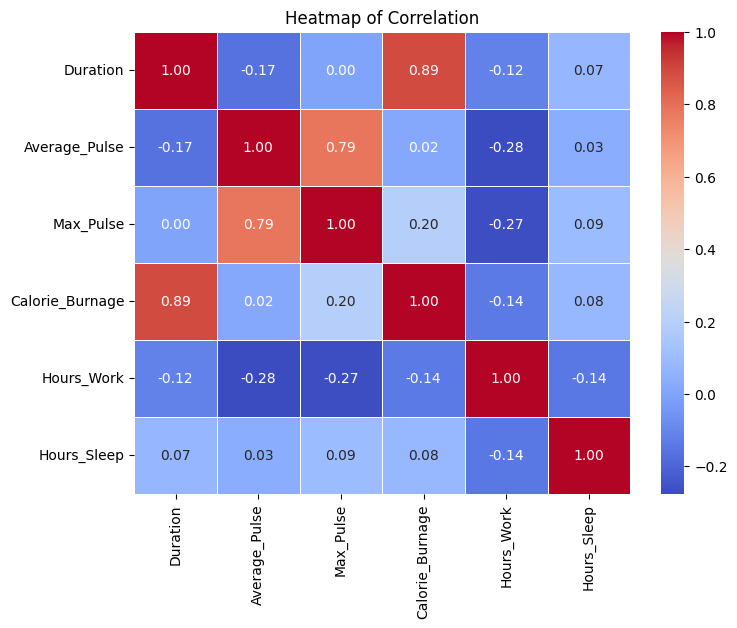

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# محاسبه ماتریس همبستگی
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Correlation")
plt.show()


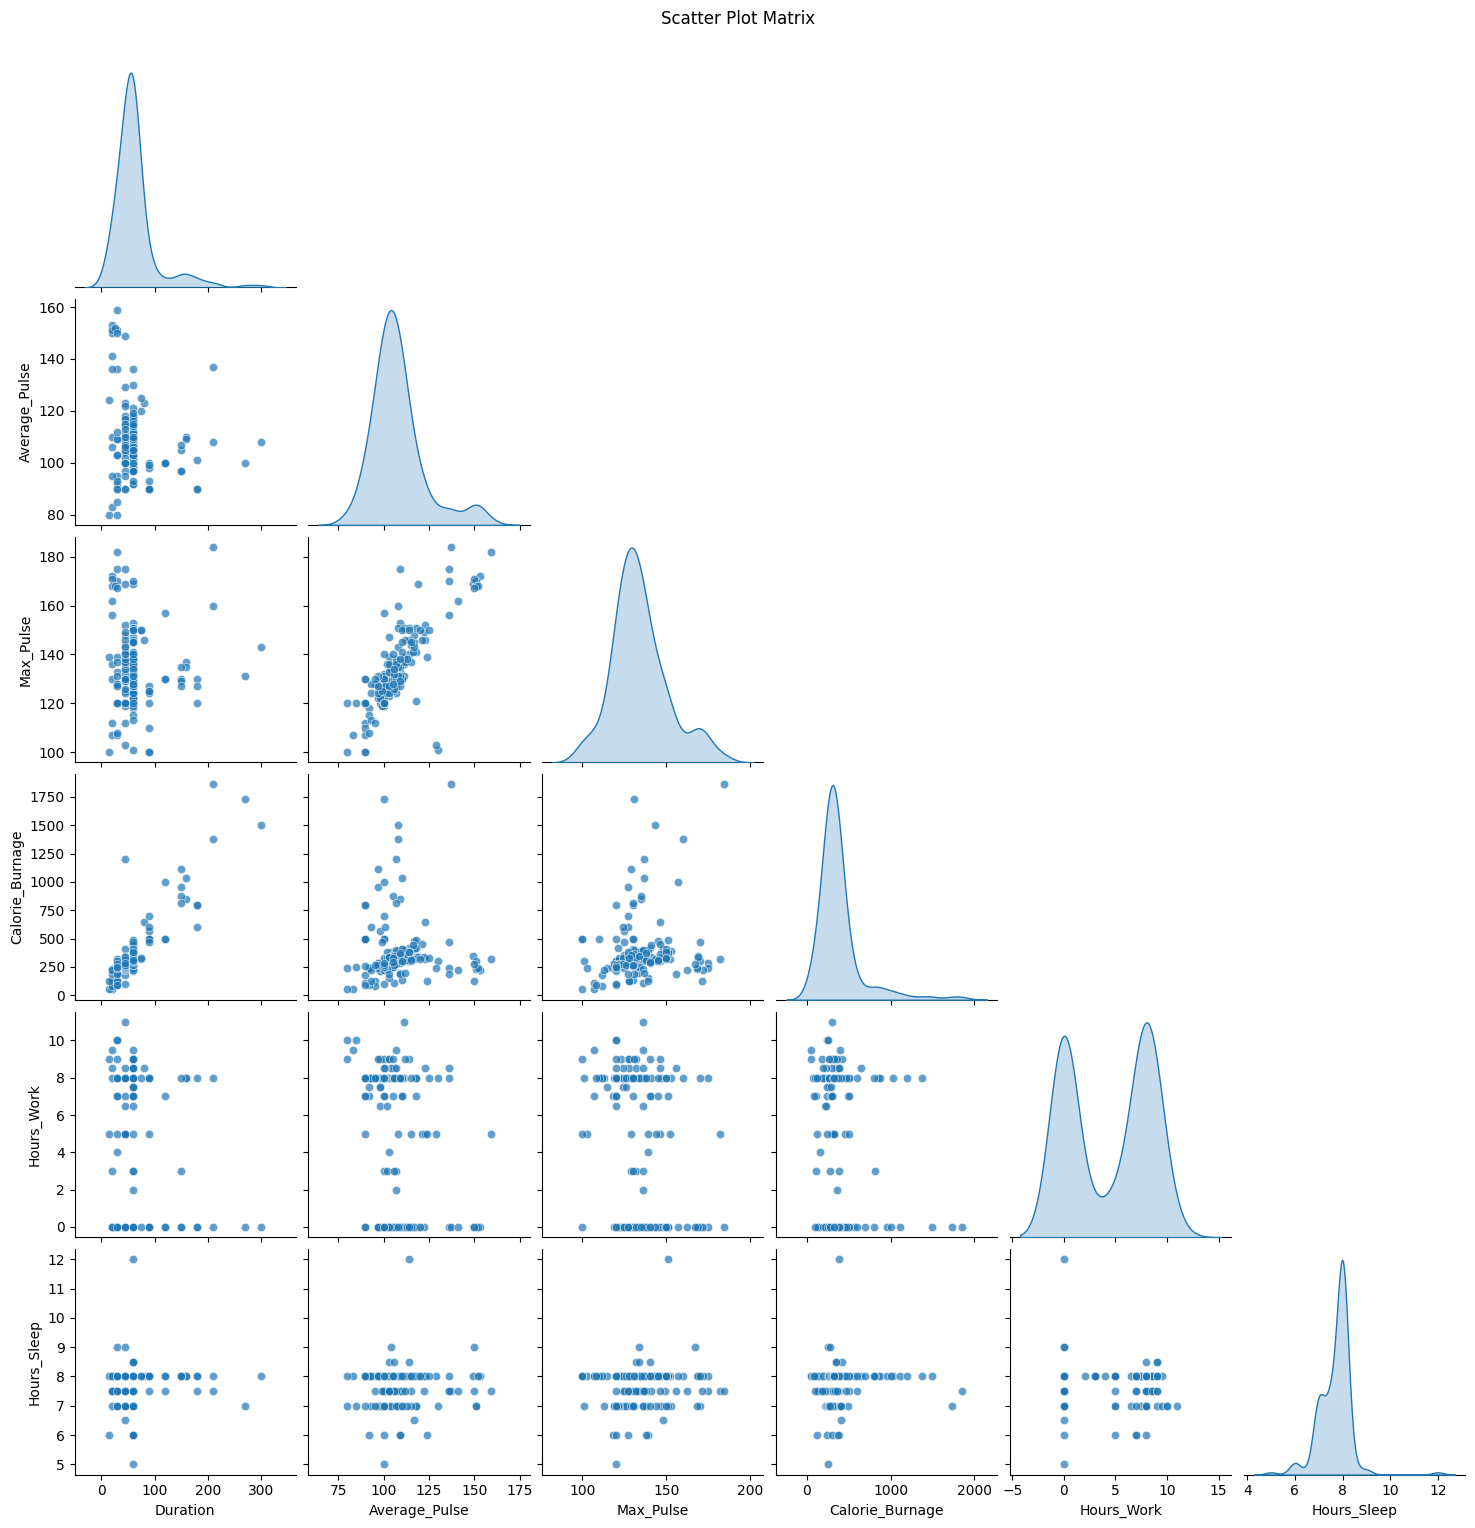

In [17]:
sns.pairplot(df, diag_kind='kde', corner=True, plot_kws={'alpha': 0.7})

# نمایش نمودار
plt.suptitle("Scatter Plot Matrix", y=1.02)  # عنوان کلی
plt.show()

In [1]:
import pandas as pd
import statsmodels.formula.api as smf

full_health_data = pd.read_csv("data7.csv", header=0, sep=",")

model = smf.ols('Calorie_Burnage ~ Average_Pulse', data = full_health_data)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:        Calorie_Burnage   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.04975
Date:                Wed, 04 Dec 2024   Prob (F-statistic):              0.824
Time:                        17:58:59   Log-Likelihood:                -1145.8
No. Observations:                 163   AIC:                             2296.
Df Residuals:                     161   BIC:                             2302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       346.8662    160.615      2.160



### **Output Analysis:**
1. **R-squared (Coefficient of Determination):**  
   The value is **0.000**, indicating that the model explains virtually none of the variance in **Calorie_Burnage**. This means **Average_Pulse** has no meaningful predictive power for this variable.

2. **Adj. R-squared (Adjusted R-squared):**  
   The value is **-0.006**, which suggests that adding this predictor does not improve the model, and it may even degrade its performance.

3. **P-value for Average_Pulse:**  
   The **P>|t|** value is **0.824**, which is far above the standard significance level (0.05). This indicates that **Average_Pulse** is not a statistically significant predictor of **Calorie_Burnage**.

4. **Intercept:**  
   The intercept value is **346.8662**, meaning that when **Average_Pulse** is zero (which might not be a realistic scenario), the predicted value of **Calorie_Burnage** is approximately this value.

5. **F-statistic and Prob (F-statistic):**  
   The F-statistic is **0.04975**, with a corresponding p-value of **0.824**, showing that the model as a whole is not statistically significant.

6. **Normality Indicators (Omnibus, Jarque-Bera):**  
   The Omnibus test and Jarque-Bera test indicate that the residuals are not normally distributed (Prob(Omnibus) = **0.000**).

7. **Durbin-Watson:**  
   The value is **1.620**, which suggests some level of independence in the residuals, though it is not ideal.


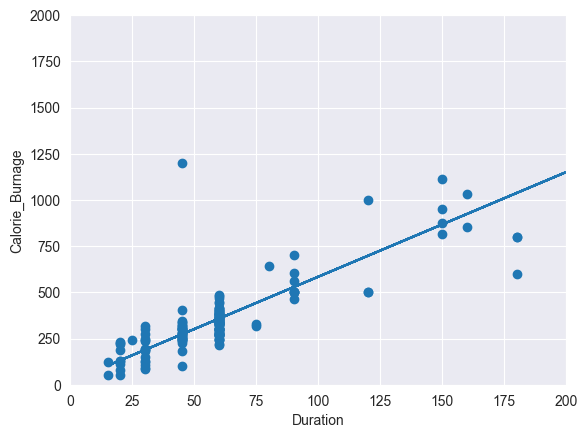

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

full_health_data = pd.read_csv("data7.csv", header=0, sep=",")

x = full_health_data["Duration"]
y = full_health_data ["Calorie_Burnage"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
 return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.ylim(ymin=0, ymax=2000)
plt.xlim(xmin=0, xmax=200)
plt.xlabel("Duration")
plt.ylabel ("Calorie_Burnage")

plt.show()